# RF Propagation Heatmap
### *Demo for plotting RF propagation heatmap using the two-dimensional signal strength data of 2.4 GHz Wi-Fi antenna.*

<img src="rf_heatmap.png" width=600 height=500/>

The data is supplied in three CSV files: X coordinates, Y coordinates and Signal Strength in dBm.

The heatmap is drawn using Matplotlib and specific "adjustments" for transparency levels of
the color map to get a smooth gradient.

Initial implementation used the masked arrays and "pcolormesh" function, but switched to "contourf" without the masked arrays, taking into account the issue with interpolation for masked arrays in Matplotlib.

At this stage the heatmap doesn't consider the penetration of obstacles, like walls,
and their impact on signal strength and propagation.

In [169]:
from matplotlib import pyplot as plt
from matplotlib import image as im
import numpy as np

# Specific values for the antenna data and the floor plan
aspect = 2.7
num_levels = 512
min_signal_strength = -48
label_pos = -7
label_step = 8

# Reading CSV into numpy arrays
signal_strength_data = np.genfromtxt("data/Signal_Strength-Table.csv", delimiter=',')
x_data = np.genfromtxt("data/X-table.csv", delimiter=',')
y_data = np.genfromtxt("data/Y-table.csv", delimiter=',')

In [170]:
# Reading and adjusting the image dimensions according to the propagation heatmap
image = im.imread("data/floor_plan1.png")
image_w = image.shape[1]
image_h = image.shape[0]

wh_ratio = image_w/image_h

plt.figure(figsize=(image_w/80, image_h/80), dpi=80)
plt.imshow(image, origin='upper', extent=[x_data.min()*2*wh_ratio, x_data.max()*2*wh_ratio,
                                          y_data.min()*2, y_data.max()*2])

# Setting the transparency values for a smooth gradient
cmap = plt.get_cmap('Paired')
cmap._init()
cmap._lut[:, 3] = np.linspace(0.4, 0.8, len(cmap._lut[:, 3]))

# Plotting the filled contour heatmap
crf = plt.contourf(
    x_data*aspect, y_data*aspect, signal_strength_data,
    levels=np.linspace(min_signal_strength, signal_strength_data.max(), num_levels),
    cmap=cmap,
    ls='-',
    origin='upper',
    antialiased=True)

cb = plt.colorbar()

# Reading the tick labels generated for the color bar
labels = sorted([t.get_text() for t in cb.ax.get_yticklabels()])

# Drawing the labels along the contour levels
for l in labels:
    plt.text(label_pos, 0, l, fontsize=7)
    label_pos -= label_step
    label_step += 0.4

# Removing the color bar and plotting all figures
cb.remove()
plt.axis('off')

# For the case of IPython Notebook "plt.show" is not invoked
# plt.show()

# We're saving the figure into PNG and showing it later as an image - 
# this provides a better formatting in IPython Notebook.
plt.savefig("heatmap.png")
plt.close()

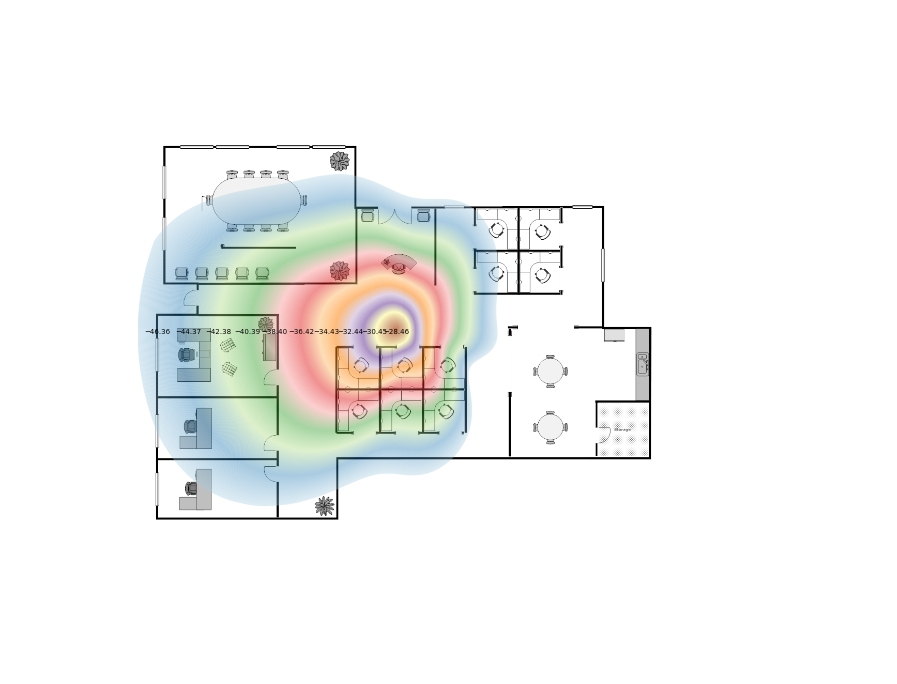

In [171]:
from IPython.display import Image
Image(filename="heatmap.png")